# **Bikes Rental Project**

In [1]:
#Importing the  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
import os 

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

# Outliers Library
from datasist.structdata import detect_outliers

#Dealing with Missing Value
from sklearn.impute import SimpleImputer,KNNImputer

# Ignoring Warnings
warnings.filterwarnings('ignore')

# save model
import joblib

# **Read The Dataset using pandas**

In [2]:
data_path = os.path.join(os.getcwd(),'../dataset','bikes.csv')
df = pd.read_csv(data_path)

# **Data Exploration**

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [5]:
## Describe all Data (numerical & categorical)
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10886,10672,10030.000000,9388.000000,8746,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000
unique,10886,4,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Winter,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2688,NaN,NaN,5793,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.029113,0.678206,NaN,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132
std,NaN,NaN,0.168131,0.467189,NaN,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454
min,NaN,NaN,0.000000,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,0.000000,0.000000,NaN,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,0.000000,1.000000,NaN,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,0.000000,1.000000,NaN,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000


In [6]:
for col in df.columns:
    print(f'Column Name : {col}\n')
    print(f'Values Count : \n{df[col].value_counts()}\n')
    print(f'Unique Values : {df[col].unique()}\n')
    print('*' * 100)

Column Name : datetime

Values Count : 
datetime
2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: count, Length: 10886, dtype: int64

Unique Values : ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']

****************************************************************************************************
Column Name : season

Values Count : 
season
Winter    2688
Fall      2680
Summer    2670
Spring    2634
Name: count, dtype: int64

Unique Values : ['Spring' nan 'Summer' 'Fall' 'Winter']

****************************************************************************************************
Column Name : holiday

Values Count : 
holiday
0.0    9738
1.0     292
Name: count, dty

# **Data Preprocessing**

### Features Extraction

In [7]:
## I produce Two New Column from Datetime Feature
df['datetime'] = pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S',errors='coerce')
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df.drop(['datetime'],axis=1,inplace=True)

In [8]:
df

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,month,day,hour
0,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,1,1,0
1,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,1,1,1
2,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,1,1,2
3,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,1,1,3
4,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,12,19,19
10882,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,12,19,20
10883,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,12,19,21
10884,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,12,19,22


In [9]:
df.isna().sum()

season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
month                    0
day                      0
hour                     0
dtype: int64

#### I calculate the percentage of missing values ​​and features that have a large percentage I delete them.
#### From This statistics we Notice that features windspeed,humidity are useless Features Thus I will drop 2 columns.

In [10]:
(df.isna().sum() / df.shape[0]) * 100

season                 1.965828
holiday                7.863311
workingday            13.760794
weather               19.658277
temp                  25.555760
humidity              31.453243
windspeed             37.350726
casual                 0.000000
registered             0.000000
rented_bikes_count     0.000000
month                  0.000000
day                    0.000000
hour                   0.000000
dtype: float64

In [11]:
df.drop(['humidity','windspeed'],axis=1,inplace=True)

### Hanlde missing values in categorical columns

In [12]:
impute = SimpleImputer(strategy='most_frequent')
df[['season','weather']] = impute.fit_transform(df[['season','weather']])

### Hanlde missing values in numerical columns

In [13]:
impute = KNNImputer()
df[['holiday','workingday','temp']] = impute.fit_transform(df[['holiday','workingday','temp']])

### Missing values ​​have been eliminated

In [14]:
df.isna().sum()

season                0
holiday               0
workingday            0
weather               0
temp                  0
casual                0
registered            0
rented_bikes_count    0
month                 0
day                   0
hour                  0
dtype: int64

### Feature Transformation

- casual user: 20 USD/hour
- registered user: 5 USD/hour
- Taxis: 14%
- Logistics: 3000 USD/year

#### **Profit =** (casual + registered) - .14 * (casual + registered) - (logistics / 365 * 24)

In [15]:
df['profit'] = df['casual'] * 20 + df['registered'] * 5 -  .14 * (df['casual'] * 20 + df['registered'] * 5) - (3000 / (365 * 24))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              10886 non-null  object 
 1   holiday             10886 non-null  float64
 2   workingday          10886 non-null  float64
 3   weather             10886 non-null  object 
 4   temp                10886 non-null  float64
 5   casual              10886 non-null  int64  
 6   registered          10886 non-null  int64  
 7   rented_bikes_count  10886 non-null  int64  
 8   month               10886 non-null  int32  
 9   day                 10886 non-null  int32  
 10  hour                10886 non-null  int32  
 11  profit              10886 non-null  float64
dtypes: float64(4), int32(3), int64(3), object(2)
memory usage: 893.1+ KB


### Detect outliers

In [17]:
idx = detect_outliers(df,0,features=['holiday','workingday','temp','month','day','hour','casual','registered','rented_bikes_count'])
df.drop(idx,axis=0,inplace=True)

# **Data Visualisations**

### Distribution plots or Numerical plots

In [18]:
df

,season,holiday,workingday,weather,temp,casual,registered,rented_bikes_count,month,day,hour,profit
0,Spring,0.0,0.0,Clear,9.840,3,13,16,1,1,0,107.157534
1,Spring,0.0,0.0,Clear,9.020,8,32,40,1,1,1,274.857534
2,Spring,0.0,0.0,Clear,9.020,5,27,32,1,1,2,201.757534
3,Spring,0.0,0.0,Clear,9.840,3,10,13,1,1,3,94.257534
4,Winter,0.0,0.0,Clear,26.732,0,1,1,1,1,4,3.957534
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,0.0,1.0,Clear,15.580,7,329,336,12,19,19,1534.757534
10882,Winter,0.0,1.0,Clear,14.760,10,231,241,12,19,20,1164.957534
10883,Winter,0.0,1.0,Clear,13.940,4,164,168,12,19,21,773.657534
10884,Winter,0.0,1.0,Clear,13.940,12,117,129,12,19,22,709.157534


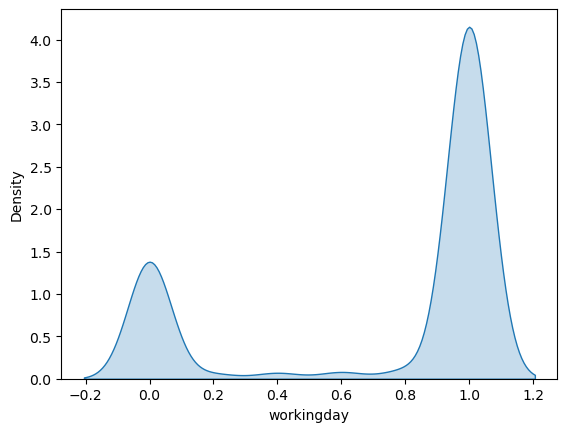

In [19]:
sns.kdeplot(x = 'workingday',shade=True,data=df)
plt.show()

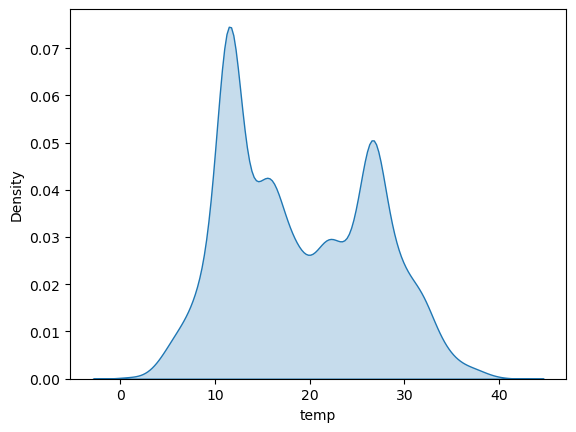

In [20]:
sns.kdeplot(x = 'temp',shade=True,data=df)
plt.show()

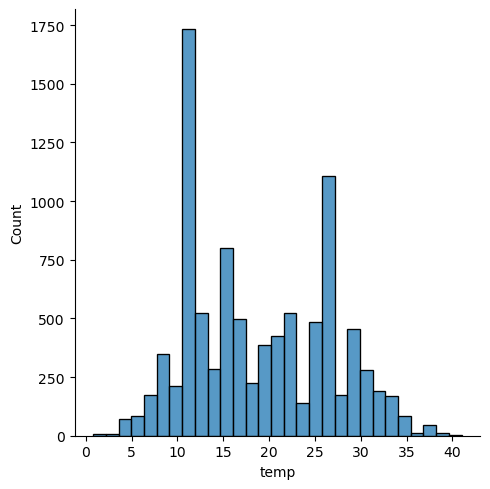

In [21]:
sns.displot(x = 'temp',data=df)
plt.show()

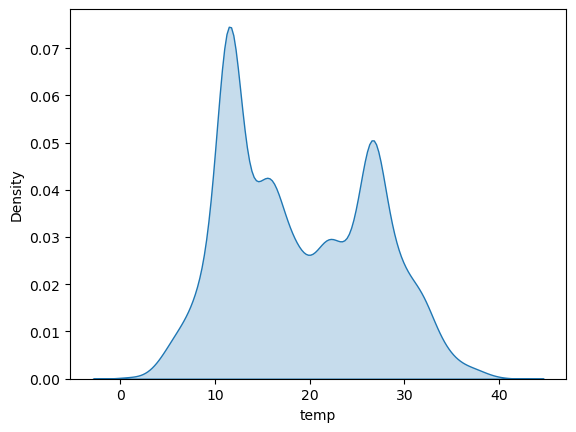

In [22]:
sns.kdeplot(x = 'temp',shade=True,data=df)
plt.show()

## The highest season in which bikes are rented is **spring**, and we can see this shown in the following Five drawings.

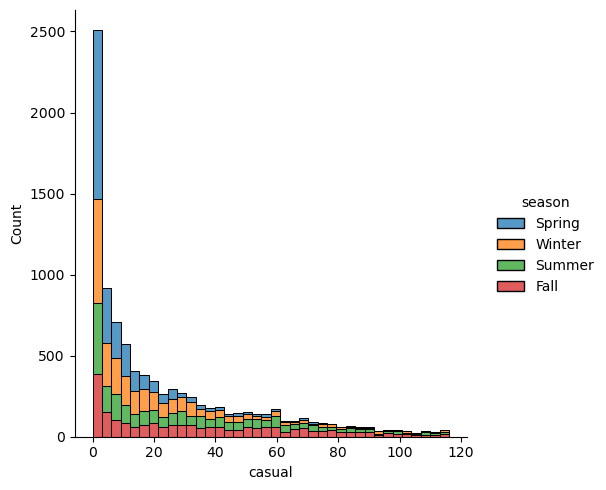

In [23]:
sns.displot(x = 'casual',data=df,hue='season',multiple = 'stack')
plt.show()

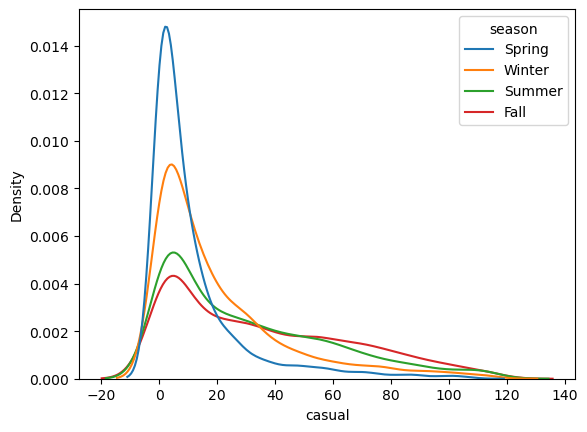

In [24]:
sns.kdeplot(x = 'casual',data=df,hue='season')
plt.show()

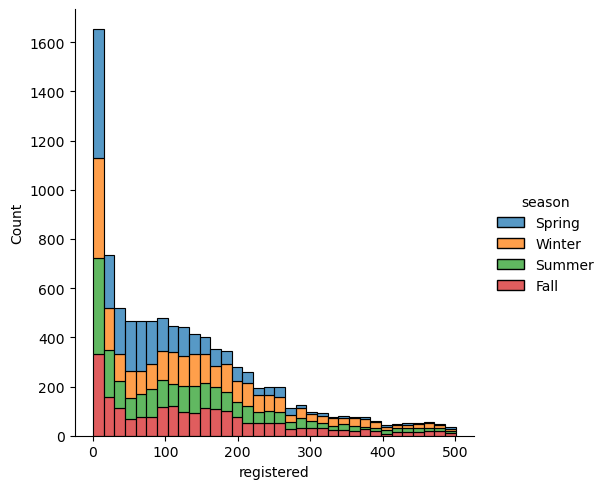

In [25]:
sns.displot(x = 'registered',data=df,hue='season',multiple = 'stack')
plt.show()

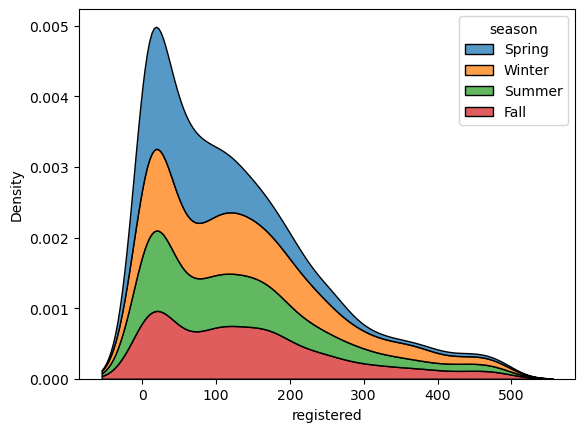

In [26]:
sns.kdeplot(x = 'registered',data=df,hue='season',multiple = 'stack')
plt.show()

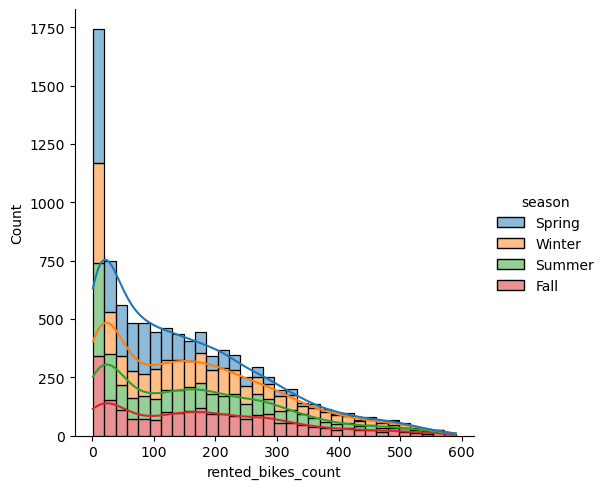

In [27]:
sns.displot(x = 'rented_bikes_count',kde=True,data=df,hue='season',multiple = 'stack')
plt.show()

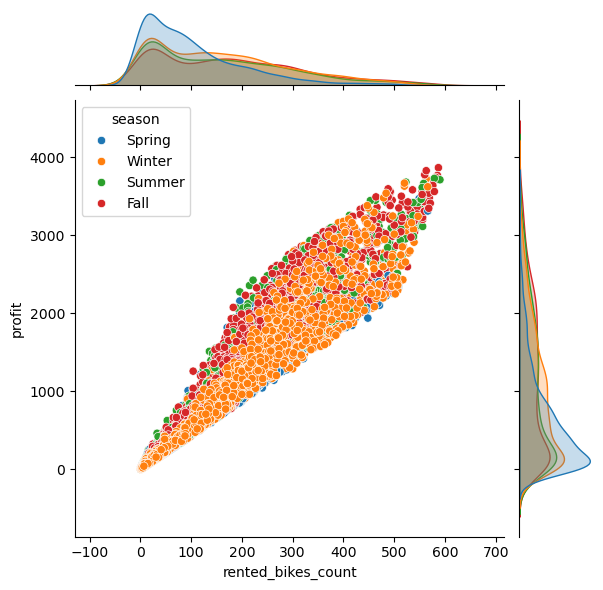

In [28]:
sns.jointplot(x ='rented_bikes_count',y='profit',hue='season',data=df)
plt.show()

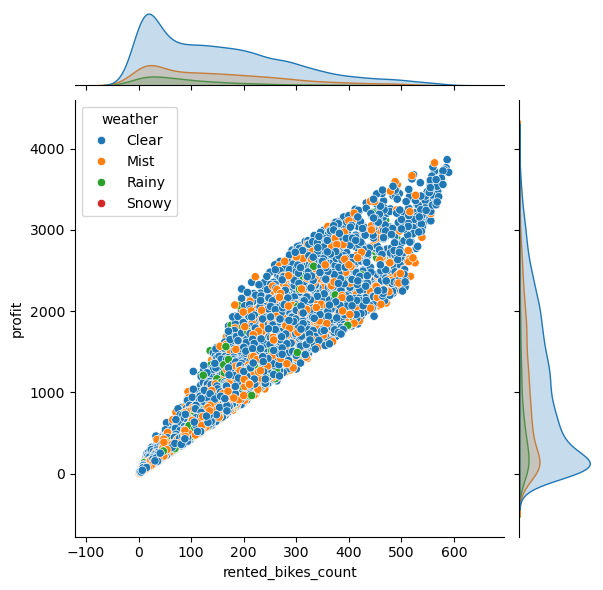

In [29]:
sns.jointplot(x ='rented_bikes_count',y='profit',hue='weather',data=df)
plt.show()

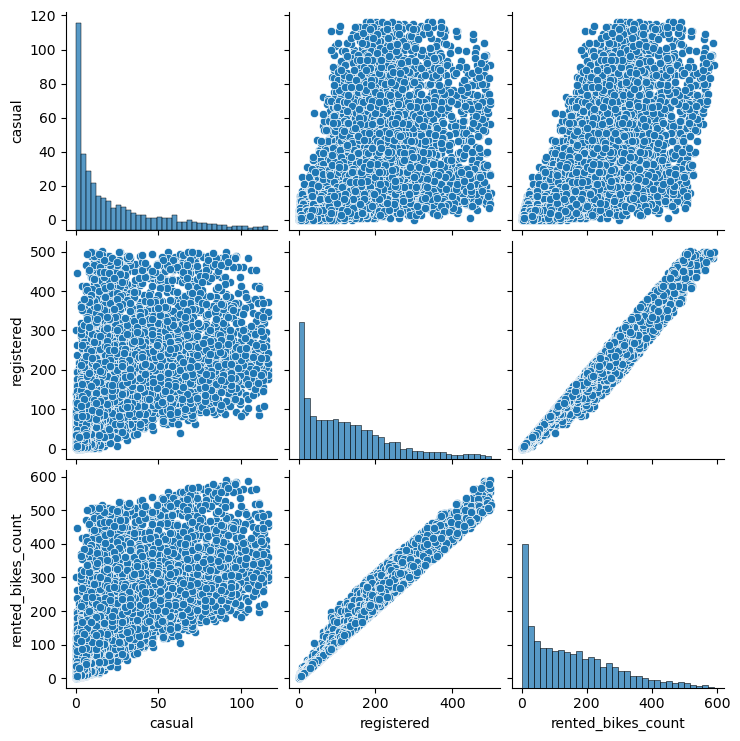

In [30]:
sns.pairplot(df[['weather','casual','registered','rented_bikes_count']],palette='Set1')
plt.show()

### Categorical plots

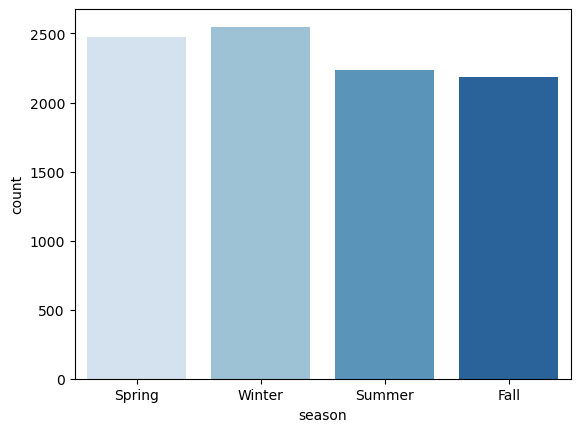

In [31]:
sns.countplot(x = 'season',data=df,palette='Blues')
plt.show()

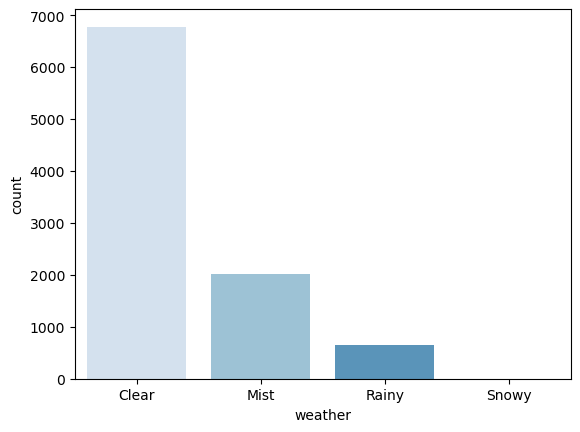

In [32]:
sns.countplot(x = 'weather',data=df,palette='Blues')
plt.show()

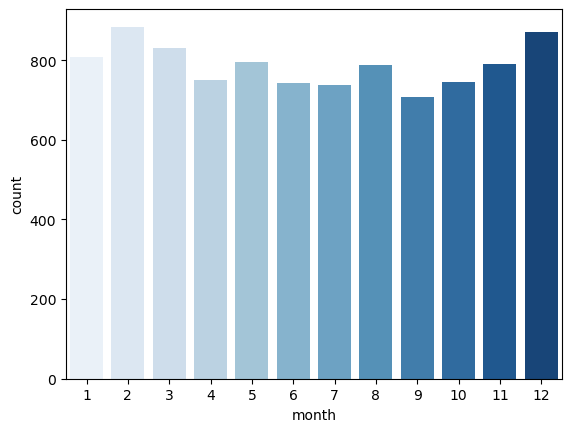

In [33]:
sns.countplot(x = 'month',data=df,palette='Blues')
plt.show()

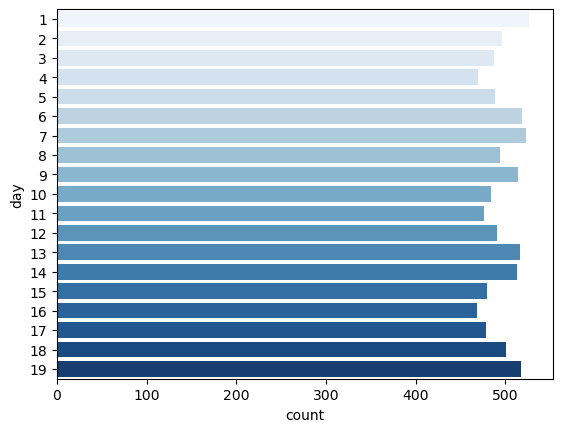

In [34]:
sns.countplot(y = 'day',data=df,palette='Blues')
plt.show()

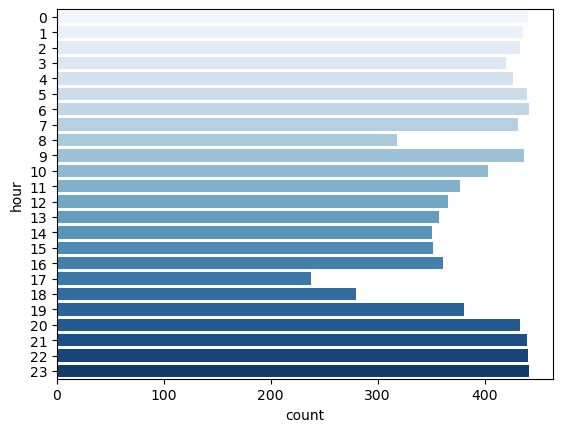

In [35]:
sns.countplot(y = 'hour',data=df,palette='Blues')
plt.show()

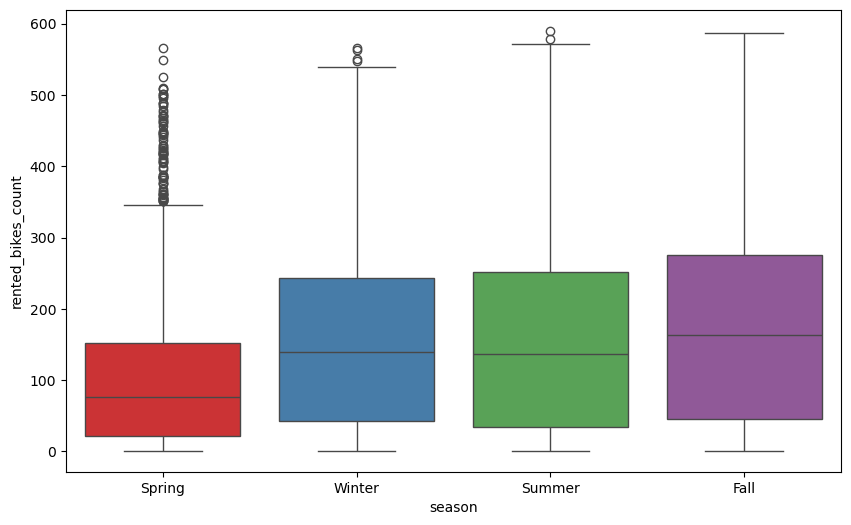

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='season',y='rented_bikes_count',data=df,palette='Set1')
plt.show()

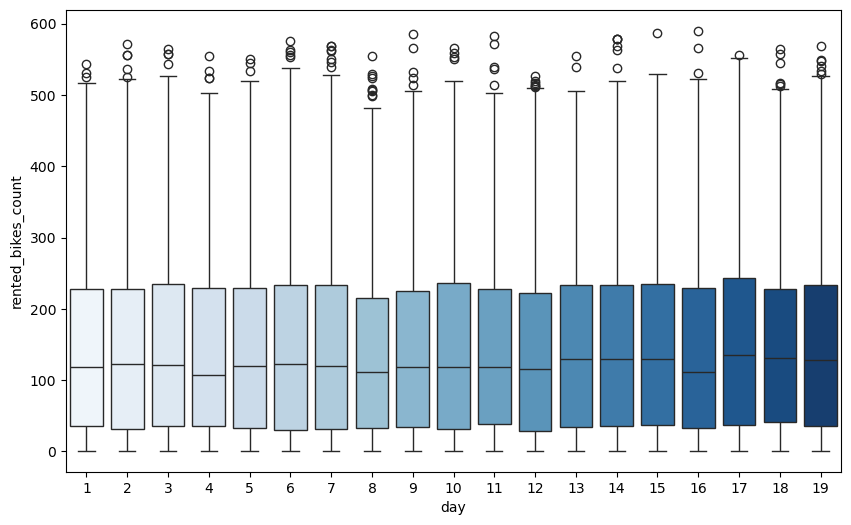

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day',y='rented_bikes_count',data=df,palette='Blues')
plt.show()

In [38]:
df

,season,holiday,workingday,weather,temp,casual,registered,rented_bikes_count,month,day,hour,profit
0,Spring,0.0,0.0,Clear,9.840,3,13,16,1,1,0,107.157534
1,Spring,0.0,0.0,Clear,9.020,8,32,40,1,1,1,274.857534
2,Spring,0.0,0.0,Clear,9.020,5,27,32,1,1,2,201.757534
3,Spring,0.0,0.0,Clear,9.840,3,10,13,1,1,3,94.257534
4,Winter,0.0,0.0,Clear,26.732,0,1,1,1,1,4,3.957534
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,0.0,1.0,Clear,15.580,7,329,336,12,19,19,1534.757534
10882,Winter,0.0,1.0,Clear,14.760,10,231,241,12,19,20,1164.957534
10883,Winter,0.0,1.0,Clear,13.940,4,164,168,12,19,21,773.657534
10884,Winter,0.0,1.0,Clear,13.940,12,117,129,12,19,22,709.157534


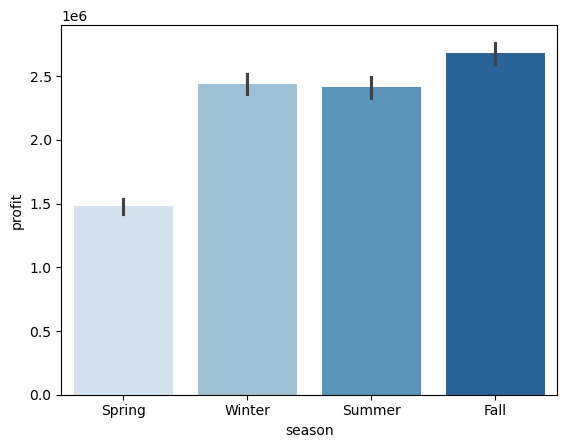

In [39]:
sns.barplot(x='season',y='profit',data=df,estimator=np.sum,palette='Blues')
plt.show()

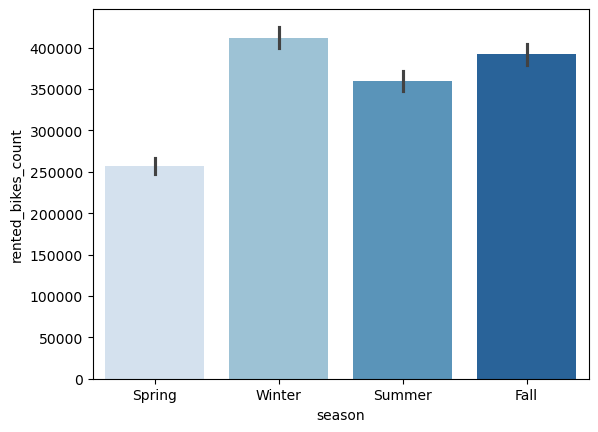

In [40]:
sns.barplot(x='season',y='rented_bikes_count',data=df,estimator=np.sum,palette='Blues')
plt.show()

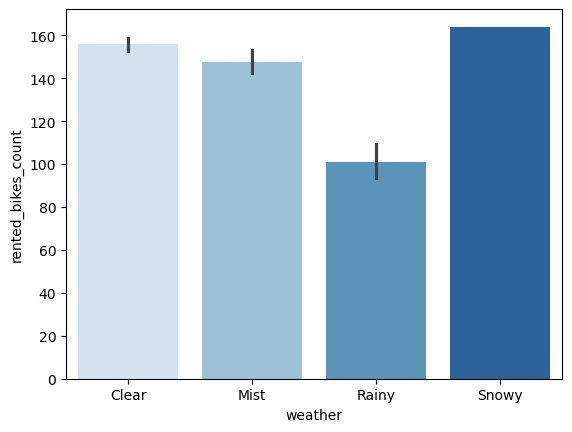

In [41]:
sns.barplot(x='weather',y='rented_bikes_count',data=df,estimator=np.mean,palette='Blues')
plt.show()

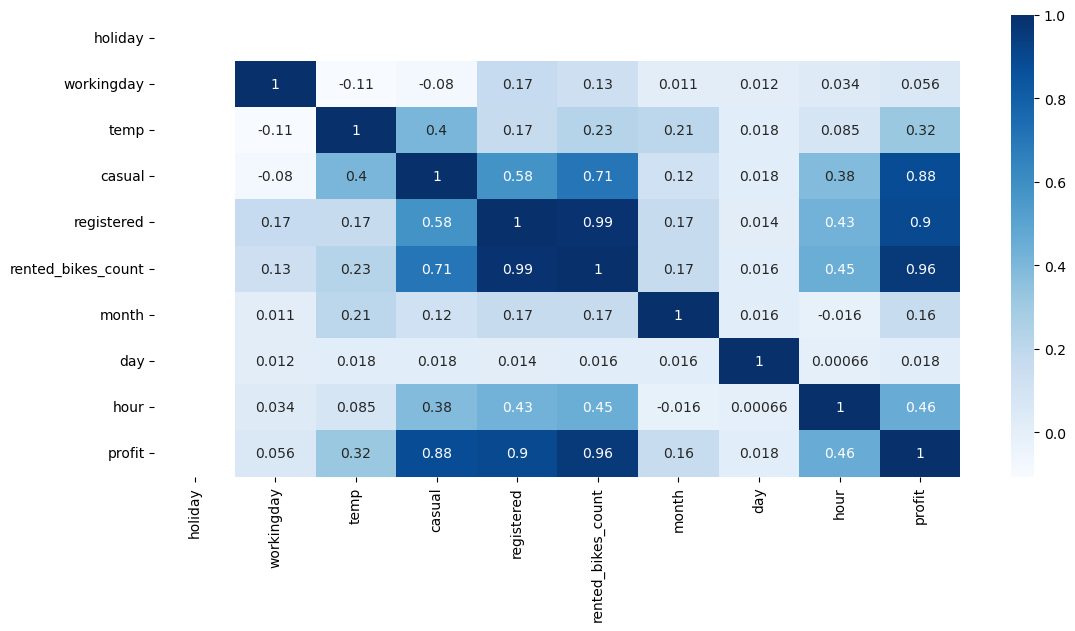

In [42]:
# sns.heatmap(df.corr())
_df = df[['holiday', 'workingday', 'temp', 'casual',
       'registered', 'rented_bikes_count', 'month', 'day', 'hour', 'profit']]
plt.figure(figsize=(13,6))
sns.heatmap(_df.corr(),annot=True,cmap='Blues')
plt.show()

# **Machine Learning**
## Without Detecting Outliers

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9447 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              9447 non-null   object 
 1   holiday             9447 non-null   float64
 2   workingday          9447 non-null   float64
 3   weather             9447 non-null   object 
 4   temp                9447 non-null   float64
 5   casual              9447 non-null   int64  
 6   registered          9447 non-null   int64  
 7   rented_bikes_count  9447 non-null   int64  
 8   month               9447 non-null   int32  
 9   day                 9447 non-null   int32  
 10  hour                9447 non-null   int32  
 11  profit              9447 non-null   float64
dtypes: float64(4), int32(3), int64(3), object(2)
memory usage: 848.8+ KB


In [44]:
df = pd.get_dummies(df, columns=['season', 'weather'], drop_first=True)

In [45]:
df

,holiday,workingday,temp,casual,registered,rented_bikes_count,month,day,hour,profit,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy
0,0.0,0.0,9.840,3,13,16,1,1,0,107.157534,True,False,False,False,False,False
1,0.0,0.0,9.020,8,32,40,1,1,1,274.857534,True,False,False,False,False,False
2,0.0,0.0,9.020,5,27,32,1,1,2,201.757534,True,False,False,False,False,False
3,0.0,0.0,9.840,3,10,13,1,1,3,94.257534,True,False,False,False,False,False
4,0.0,0.0,26.732,0,1,1,1,1,4,3.957534,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.0,1.0,15.580,7,329,336,12,19,19,1534.757534,False,False,True,False,False,False
10882,0.0,1.0,14.760,10,231,241,12,19,20,1164.957534,False,False,True,False,False,False
10883,0.0,1.0,13.940,4,164,168,12,19,21,773.657534,False,False,True,False,False,False
10884,0.0,1.0,13.940,12,117,129,12,19,22,709.157534,False,False,True,False,False,False


In [46]:
x = df.drop(['casual','registered','rented_bikes_count','profit'],axis=1)
y = df['profit']

In [47]:
x.head()

,holiday,workingday,temp,month,day,hour,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy
0,0.0,0.0,9.840,1,1,0,True,False,False,False,False,False
1,0.0,0.0,9.020,1,1,1,True,False,False,False,False,False
2,0.0,0.0,9.020,1,1,2,True,False,False,False,False,False
3,0.0,0.0,9.840,1,1,3,True,False,False,False,False,False
4,0.0,0.0,26.732,1,1,4,False,False,True,False,False,False


In [48]:
y.head()

0    107.157534
1    274.857534
2    201.757534
3     94.257534
4      3.957534
Name: profit, dtype: float64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)

In [50]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [51]:
models = {
    'LR':LinearRegression(),
    'DT':DecisionTreeRegressor(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR(),
    'XGB':XGBRegressor(),
    'RF':RandomForestRegressor()
}

In [52]:
for name,model in models.items():
    print(f"Model Name : {name}")
    model.fit(x_train,y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    print(f"Train MAE : {mean_absolute_error(y_train,y_pred_train)}")
    print(f"Test MAE : {mean_absolute_error(y_test,y_pred_test)}\n")

    print(f"Train RMSE : {np.sqrt(mean_squared_error(y_train,y_pred_train))}")
    print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test,y_pred_test))}\n")

    print(f"Train R2 : {r2_score(y_train,y_pred_train)}")
    print(f"Test R2 : {r2_score(y_test,y_pred_test)}\n")
    print('-'*50)


Model Name : LR
Train MAE : 546.7059904690122
Test MAE : 535.9731475845276

Train RMSE : 693.5927258680802
Test RMSE : 687.1793179963788

Train R2 : 0.3339240229167679
Test R2 : 0.3229729633281574

--------------------------------------------------
Model Name : DT
Train MAE : 4.648802434828636
Test MAE : 369.1038095238095

Train RMSE : 43.86367385828095
Test RMSE : 566.3046351884989

Train R2 : 0.9973360582855404
Test R2 : 0.5402030513609157

--------------------------------------------------
Model Name : KNN
Train MAE : 276.9828185788011
Test MAE : 353.631544973545

Train RMSE : 395.6888563412318
Test RMSE : 500.5166799377149

Train R2 : 0.7832184335965077
Test R2 : 0.6408275952542771

--------------------------------------------------
Model Name : SVR
Train MAE : 601.1414885249276
Test MAE : 593.0809585031702

Train RMSE : 787.6552952692788
Test RMSE : 776.9092985155409

Train R2 : 0.14101198370725487
Test R2 : 0.13462072328049512

--------------------------------------------------
M

In [53]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
model.predict(x_test).tolist()

[1523.4915342465738,
 600.5825342465761,
 1605.9655342465749,
 292.70253424657517,
 713.9305342465755,
 1732.8155342465755,
 17.889534246575348,
 1628.2395342465754,
 1451.7675342465739,
 15.223534246575333,
 1407.7212009132415,
 633.8645342465758,
 1420.334534246575,
 684.9055342465754,
 1649.911534246577,
 1084.8055342465768,
 734.8715342465747,
 1461.5285342465752,
 1175.7362009132405,
 465.90653424657484,
 298.89453424657506,
 1726.8385342465751,
 455.0046009132422,
 1781.4915342465738,
 1712.4765342465741,
 1124.6235342465748,
 1526.845534246574,
 561.0655342465758,
 174.23753424657534,
 469.4755342465755,
 1456.4975342465746,
 7.397534246575352,
 129.04453424657535,
 43.990534246575365,
 45.3880342465753,
 677.5955342465761,
 1171.6655342465733,
 2810.223534246576,
 2399.100534246575,
 48.97853424657539,
 53.45053424657536,
 711.5225342465752,
 234.8675342465752,
 1218.9225342465757,
 542.7045342465755,
 633.8645342465758,
 128.9370342465753,
 7.913534246575348,
 1471.63353424657

In [55]:
y_pred_test.tolist()

[1541.1215342465744,
 678.4125342465758,
 1566.7065342465762,
 327.87653424657515,
 646.9365342465758,
 1680.0975342465756,
 17.115534246575344,
 1557.289534246575,
 1469.9565342465735,
 16.04053424657534,
 1390.4495342465755,
 600.4965342465762,
 1344.3105342465742,
 711.092534246576,
 1585.723284246576,
 1115.206534246576,
 804.8325342465754,
 1424.5915342465748,
 1247.5892009132413,
 481.214534246575,
 342.797534246575,
 1697.856534246575,
 440.34088424657534,
 1798.2615342465751,
 1669.1755342465754,
 1222.4055342465747,
 1638.4735342465742,
 641.8195342465758,
 166.62653424657532,
 460.18753424657547,
 1416.765534246575,
 7.44053424657535,
 126.76553424657531,
 46.22653424657538,
 40.6365342465753,
 722.2725342465761,
 1177.7715342465733,
 2746.041734246576,
 2370.806534246575,
 51.94553424657539,
 51.558534246575356,
 712.511534246575,
 264.150534246575,
 1177.0405342465758,
 565.7525342465757,
 600.4965342465762,
 133.12953424657536,
 8.12853424657535,
 1468.6665342465765,
 2238

#### Metrics

In [56]:
mean_absolute_error(y_test,y_pred_test)

287.3048033690266

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

427.13561846453155

In [58]:
r2_score(y_test,y_pred_test)

0.7384242803010057

#### Test Model

In [59]:
new_predict = [1,0,30,10,1,17,1,0,0,0,0,0]
new_predict = scaler.transform([new_predict])
new_predict

array([[ 1.        , -1.72248224,  1.42095823,  1.00742157, -1.61815747,
         0.79147204,  1.64938547, -0.55249309, -0.6234459 , -0.51401755,
        -0.24618298,  0.        ]])

In [60]:
model.predict(new_predict)[0]

2297.921534246576

## Saving Model

In [61]:
joblib.dump(model,'../model/model.h5')
joblib.dump(scaler,'../model/scaler.h5')

['../model/scaler.h5']